In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats as wstats
import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sma

pd.set_option('display.max_columns',None) # this is to see all columns from dataset, as python hides some columns from data


# Descriptive statistics

In [228]:
# load dataset

data=pd.read_csv('housing data.csv')
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [229]:
# No of rows and columns in dataset

print('No.of rows:',data.shape[0],'No. of columns:',data.shape[1])

No.of rows: 1418 No. of columns: 13


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference: The info of the dataset shows that there are missing values in electrical, garage type, fence and misc. features

pandas automatically considers null values as NaN, but if there are any other characters in place of null values we can add :
    
    na_values=' any special charcater that is in dataset'

In [231]:
# describe the 5 point summary of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns: TotalBsmtSF, GrLivArea,SalePrice

In [232]:
data.describe(include='object').T # description about the category columns

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [233]:
# Identify the numeric colunms and the category columns of the data

# we should read the data and identify whether the column is categorical or numeric column individually

#easy way to find which kind of column is.... ye take colmn and find value count:
 
    ##  data['YearBuilt'].value_counts()

    

num_cols=['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols=['OverallQual','Electrical','FullBath','GarageType','GarageCars','Fence','MiscFeature']

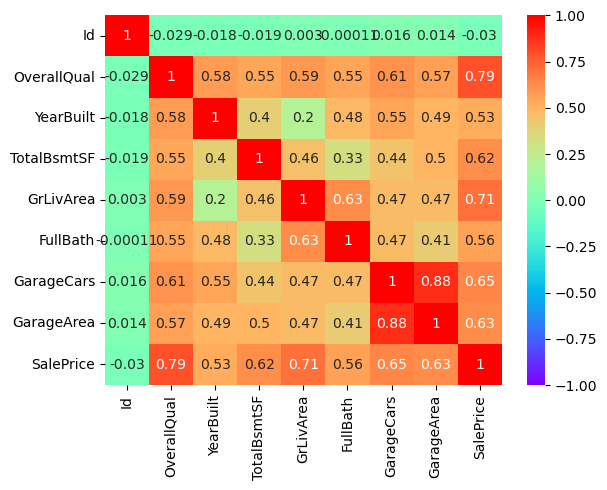

In [234]:
# correlation Plot

sns.heatmap(data.corr(numeric_only=True),vmin=-1,vmax=1,cmap='rainbow',annot=True);

In [235]:
data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [236]:
# Let's remove id column as it makes no sense in the data
del data['Id']

In [237]:
data.columns # to know column names from dataset

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

# Univariate Analysis on the Data

this means analysing each column column individually

### Number columns

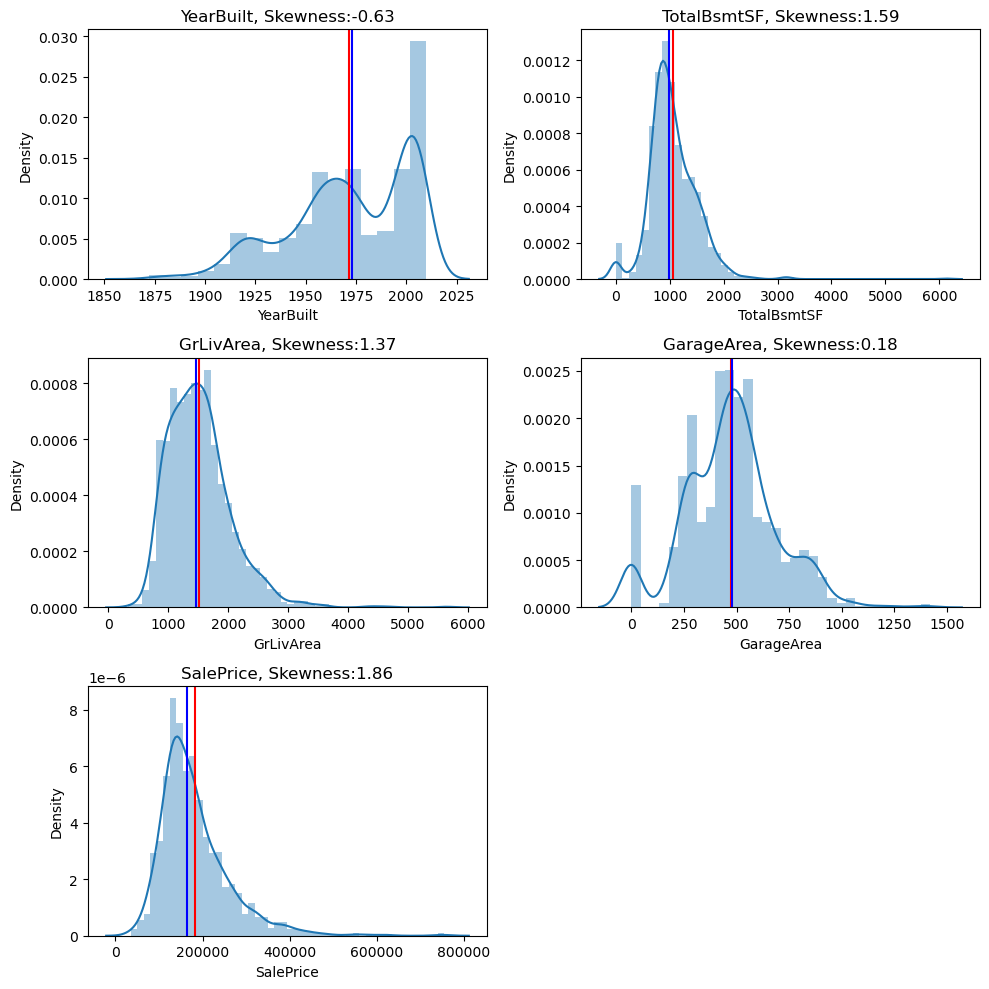

In [238]:

plt.figure(figsize=(10,10))
t=1

for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness:{round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='b')
    t+=1
plt.tight_layout()
plt.show()

Inferences:

    1= the distribution of year built shows most of the properties are recent

    2= most of the properties have total basement area between 500 - 1200 sqft and its right skewed.

    3= most of the properties have ground living areas between 1000 - 2000 sqfts and its also right skewed

    4= most of the properties has garage area between 400-600 sqft and its approximately normal

    5= most of the properties has sale price more than 2 lacs and it is right skewed

### Category columns

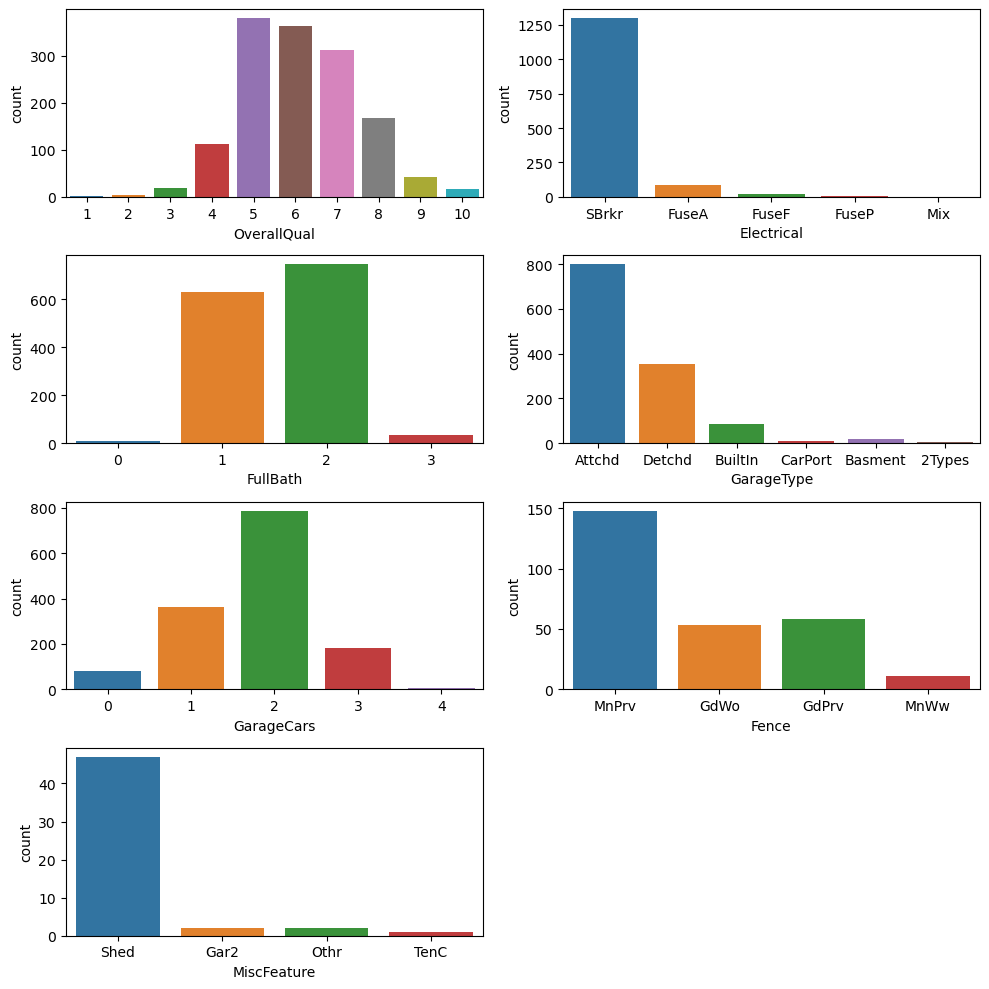

In [239]:
plt.figure(figsize=(10,10))

t=1

for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

Inferences:


    1= Most properties has built betwen 5 and 7

    2= most properties have Sdkr electrical work

    3= most of the properties have either 1 or 2 bathrooms

    4= maximum properties have attatched or detached garage types.

    5= most of the garages can park 2 cars

    6= most of the properties dont have fences

    7= most of the properties has misc feature as shed

# Bivariate Analysis on the Data

### Numbers vs Numbers

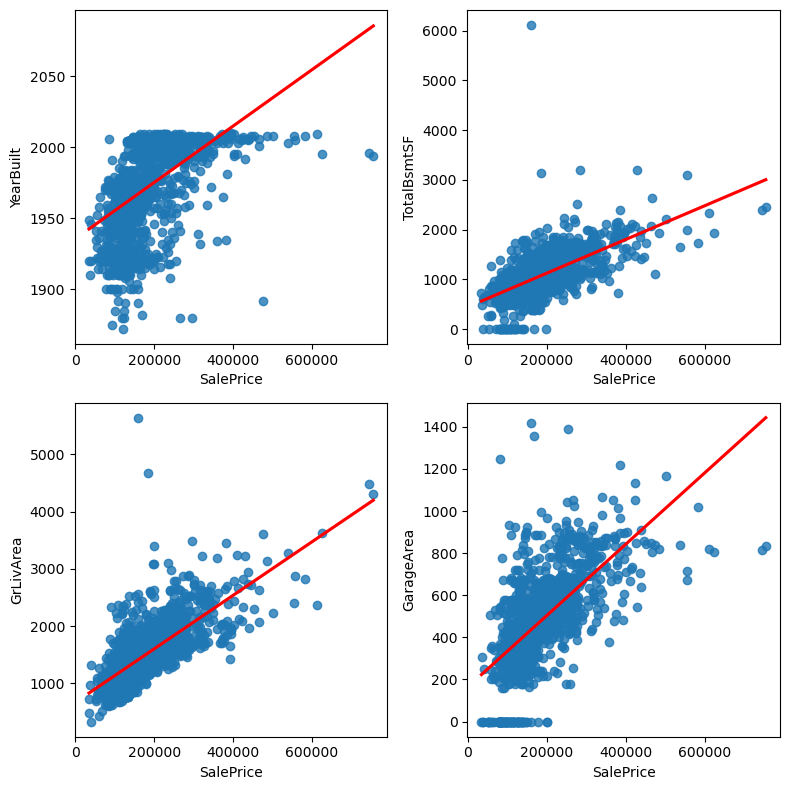

In [240]:
plt.figure(figsize=(8,8))


t=1
for i in num_cols:
    if i!= 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(y=data['SalePrice'],x=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

### Numbers vs Category

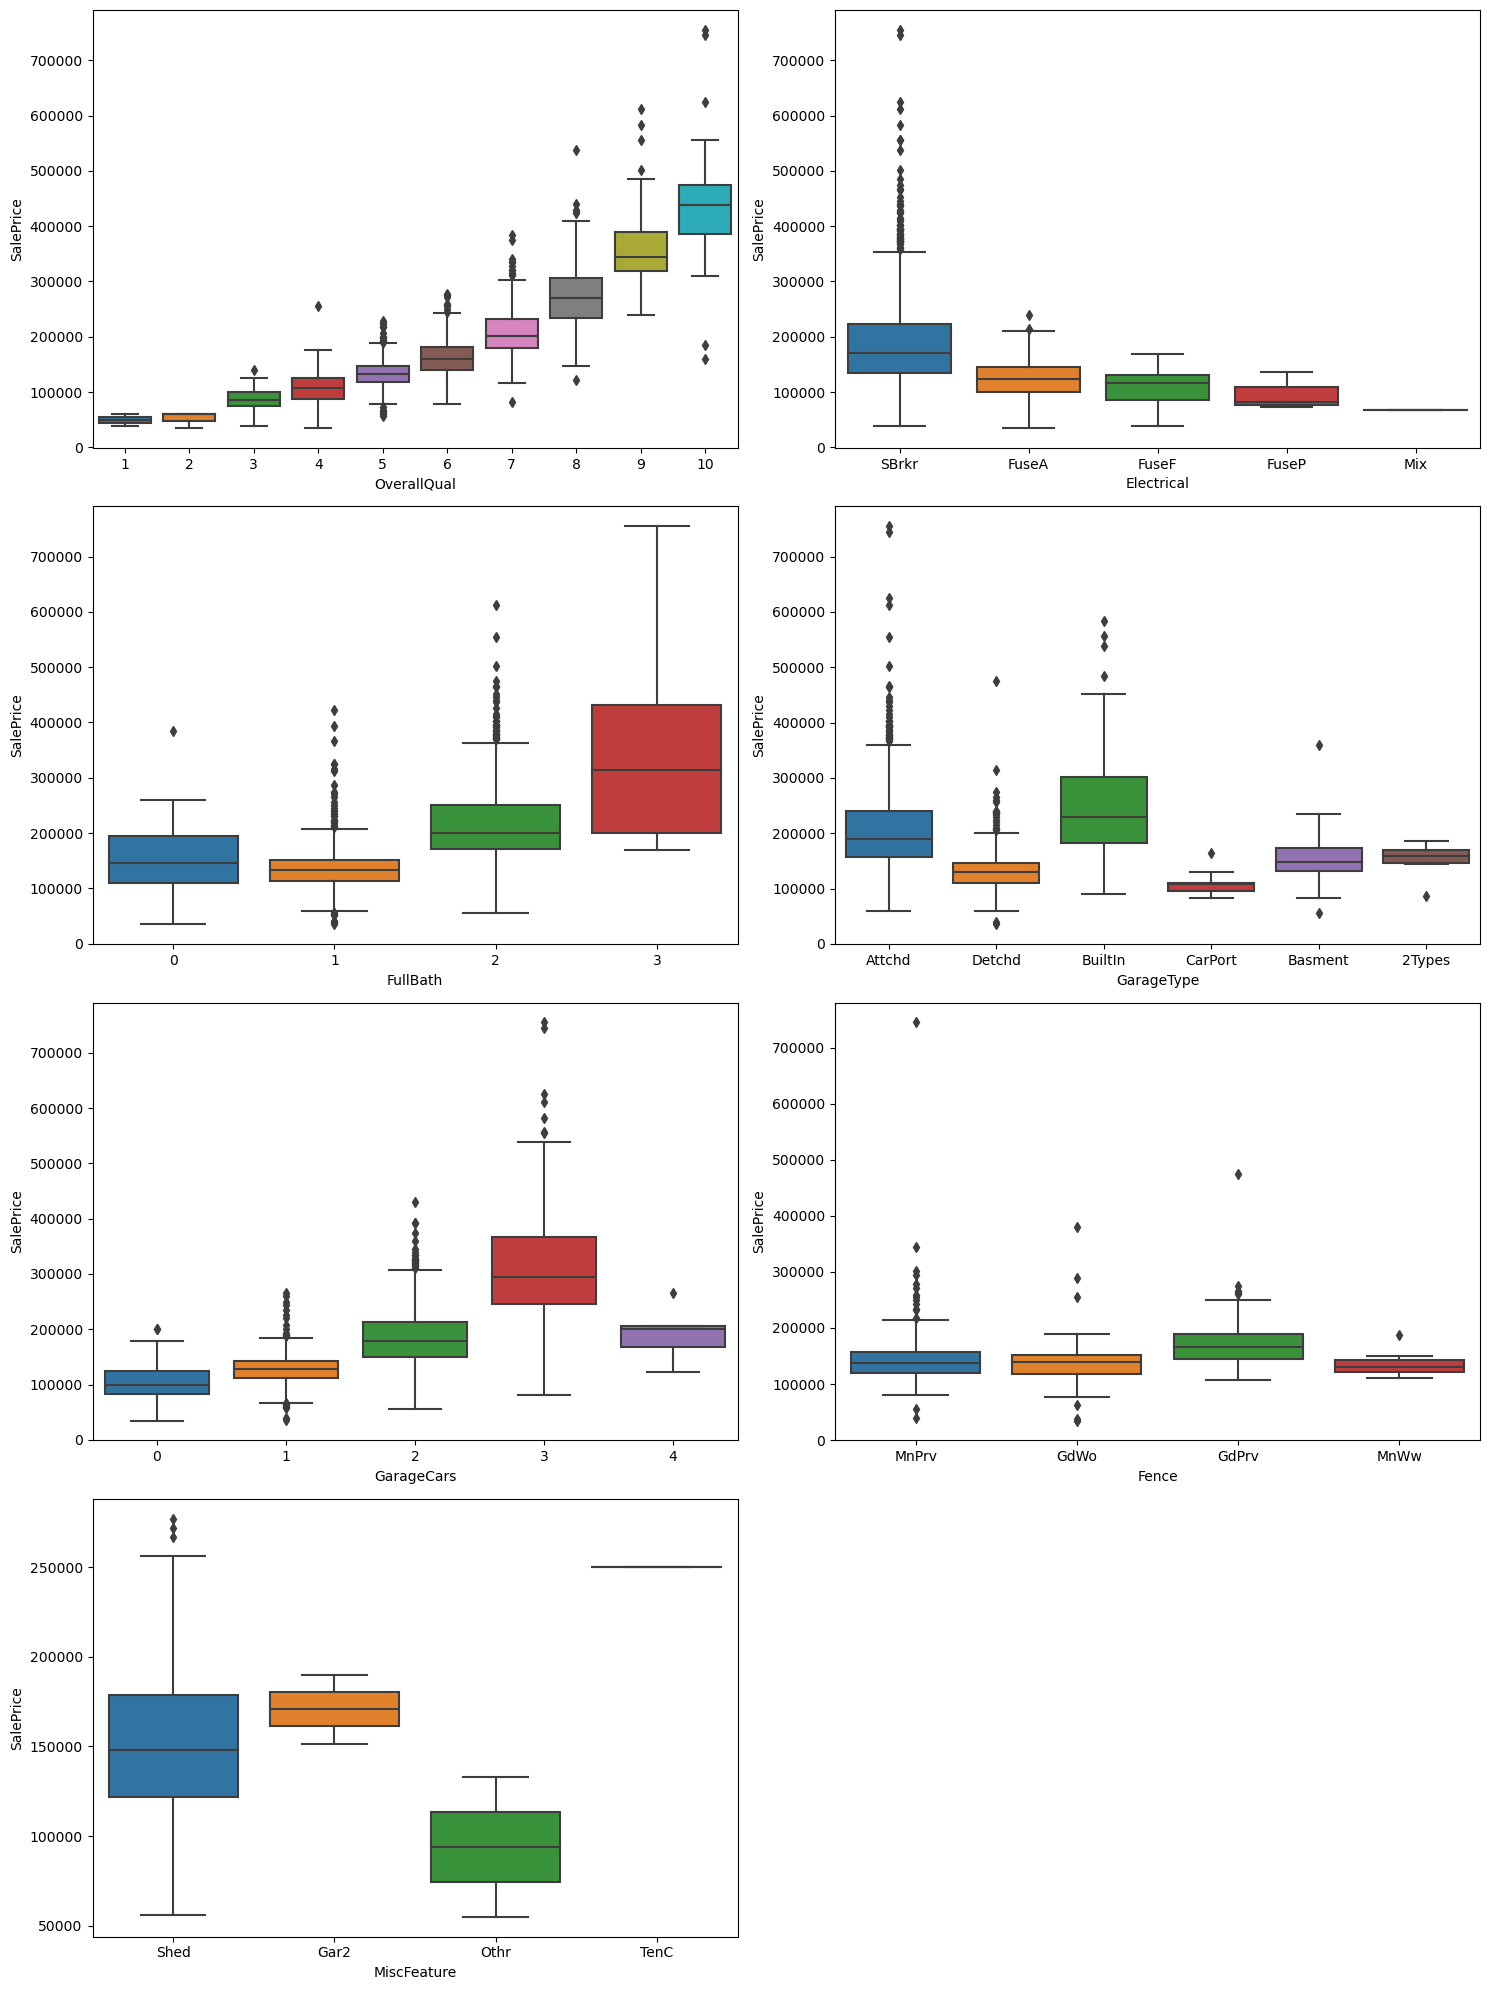

In [241]:
plt.figure(figsize=(15,20))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

Inference:
    
    1= as overall quality increases, sales price increases
    
    2= Sbrkr category in electrical has higher sale price as compared to other categories
    
    3= as no. of bathroom increases the sales price increases
    
    4= Built-in and attatched garage has high sales price
    
    5= garage with more car capacity, has high sales price

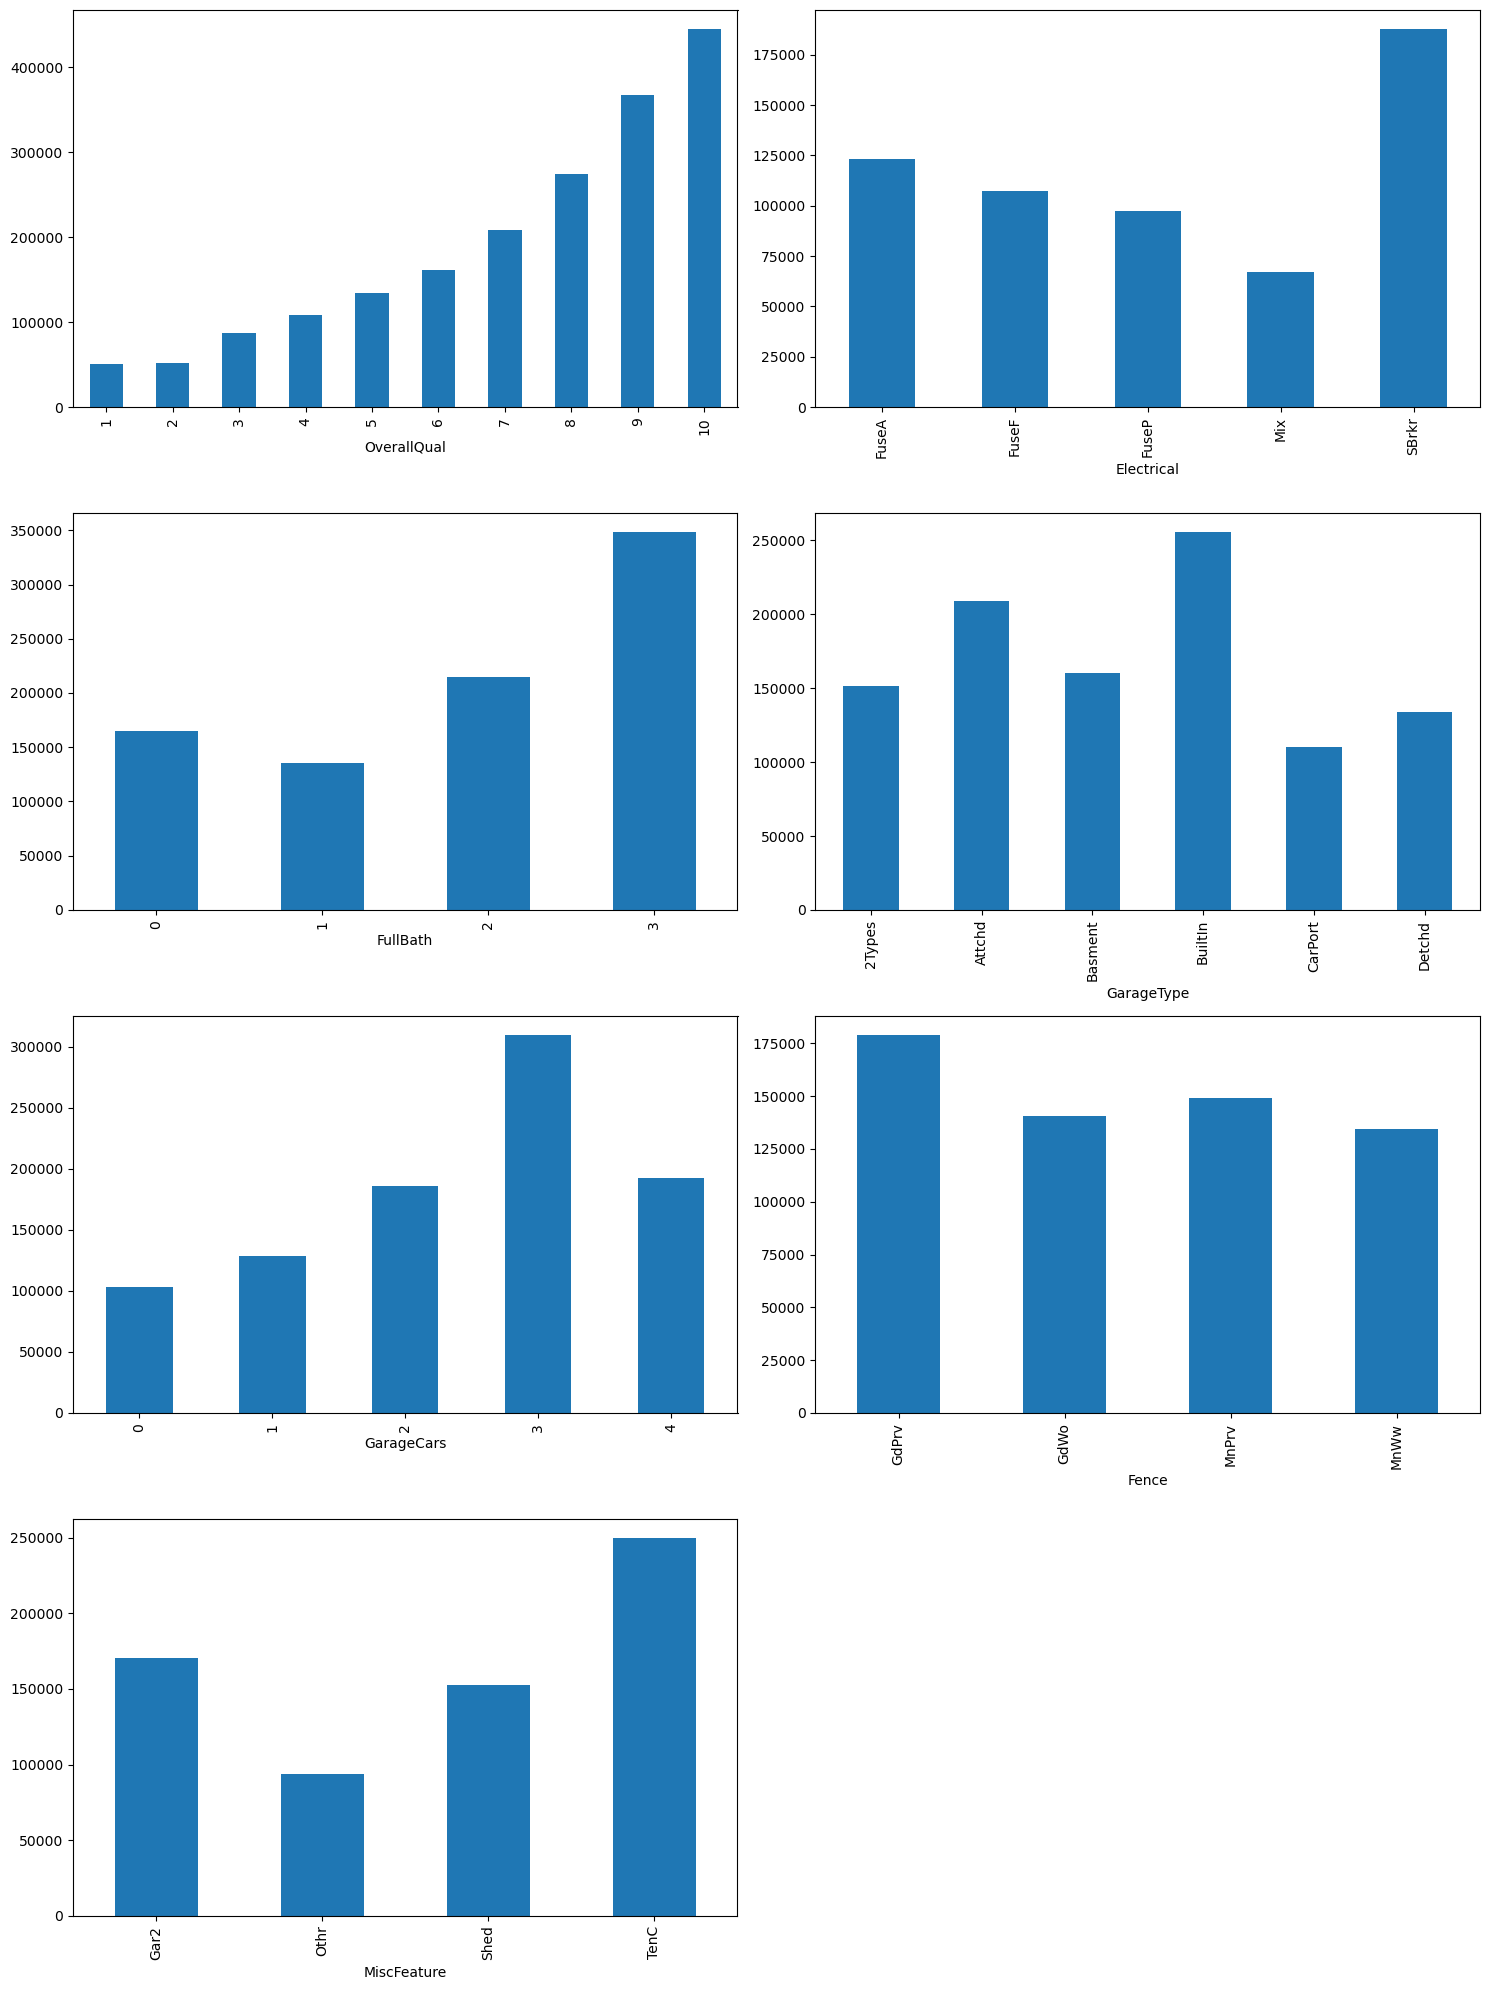

In [242]:
plt.figure(figsize=(15,20))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

## Statistical Analysis

#### Key Inferences:

* YearBuilt,GrlicArea, TotalBsmtSf and GarageArea are related to the SalePrice
* BuiltQual,Electrical,FullBath,GarageType and GarageCars are also affecting the SalePrice

 #### Lets explore YearBuilt and SalePrice statistically

In [243]:
# Assumptions: Data must be normal

# Ho: the data is normal
# Ha: the data is not normal

print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))


# since both the p-values are less than 0.05, we have to reject the Ho as data is not normal
# As assumption is failed, we will use spearman's correlation test(Non-Parametric)

ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [244]:
# Spearman's correlation test
# Ho: samples are independent
# Ha: samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


##### statistical test for all numemric columns with respect to SalePrice

In [245]:
for i in num_cols:
    if i!='SalePrice':
        print(i,stats.spearmanr(data['SalePrice'],data[i]))

YearBuilt SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
TotalBsmtSF SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
GrLivArea SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
GarageArea SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


##### Lets prove affect of garage type on saleprice statistically

In [246]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [247]:
# kruskal-Wallis test

#Ho: mu1=mu2=mu3....mu6
#Ha: atleast one mean id different

s1=data[data['GarageType']=='Attchd']['SalePrice']
s2=data[data['GarageType']=='Detchd']['SalePrice']
s3=data[data['GarageType']=='BuiltIn']['SalePrice']
s4=data[data['GarageType']=='CarPort']['SalePrice']
s5=data[data['GarageType']=='Basment']['SalePrice']
s6=data[data['GarageType']=='2Types']['SalePrice']


print(stats.kruskal(s1,s2,s3,s4,s5,s6))

KruskalResult(statistic=440.6623751087267, pvalue=5.0735517569761e-93)


# Data Preprocessing

## Feature Engineering

In [248]:
# we will create a new column 'age' by assumingthe data was collected in 2010.
# we will start by subtracting uear built with 2010

data['Age']= 2010-data['YearBuilt']
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500,9
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000,95
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000,10


In [249]:
data.drop(columns='YearBuilt',axis=1,inplace=True)

<Axes: xlabel='SalePrice', ylabel='Age'>

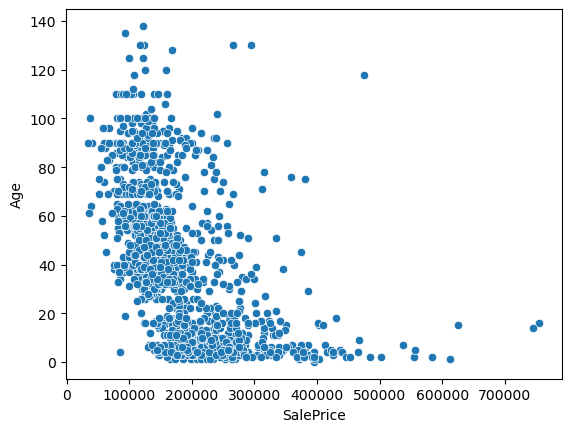

In [250]:
sns.scatterplot(x=data['SalePrice'],y=data['Age'])

In [251]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


## Missing Values

In [252]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
Age             0.000000
dtype: float64

In [253]:
# missing values

# closest fit = to finding the best fit value for place of missing value with reference of any other column
# central value imputation = using mean,median,mode of that relevent category for tha place of missing value
#deletion ( used when lot of data is missing in a column or very few rows i the data has missing values)

In [254]:
# Lets treat missing values in electrical column

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [255]:
# using central value imputation

data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [256]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


no missing value left in electrical column

In [257]:
# lets treat missing value in garagetype

data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [258]:
# lets impute the missing values where garage area and garage cars are 0 with new category 'NoGarage


data['GarageType']= np.where((data['GarageArea']==0)&(data['GarageCars']==0),'NoGarage',data['GarageType'])

In [259]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
47,5,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000,44
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500,68
1317,5,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000,44
1357,5,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000,60
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70


In [260]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
47,5,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000,44
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500,68
1317,5,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000,44
1357,5,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000,60
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70


In [261]:

# remaining 62 missing values are from where garage cars are 1, so we will impute mode of garage type where garage car is 1
data['GarageType'].fillna('Detchd',inplace=True)

In [262]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


no missing values in GarageType now

In [263]:
 # lets treat missing values in fence
    
    
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [264]:
# lets bin this data into 0-> fence not present, 1-> fence present

data['Fence']= np.where(data['Fence'].isnull(),0,1)

In [265]:
data['Fence'].value_counts()

Fence
0    1148
1     270
Name: count, dtype: int64

In [266]:
# lets validate this statistically
# Ho: the samples are independent
# Ha: the samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],
                  data[data['Fence']==1]['SalePrice'])

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<Axes: xlabel='Fence', ylabel='SalePrice'>

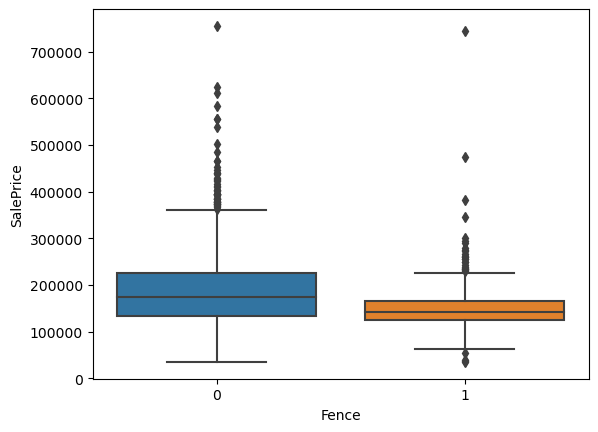

In [267]:
sns.boxplot(x=data['Fence'],y= data['SalePrice'])

we can see that houses with no fences have higher sale price than those which have fencing

In [268]:
# lets treat missing value in Miscellaneous Features column

data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [269]:
#lets assume Nan(s) here means no miscellaneous feature
# 1-> MiscFeature Yes
# 2-> MiscFeature No

data['MiscFeature']= np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

MiscFeature
0    1366
1      52
Name: count, dtype: int64

In [270]:
# lets verify statistically

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                   data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174016)

as p-value is less than 0.05, it shows that both columns are independent and have no relation in between

<Axes: xlabel='MiscFeature'>

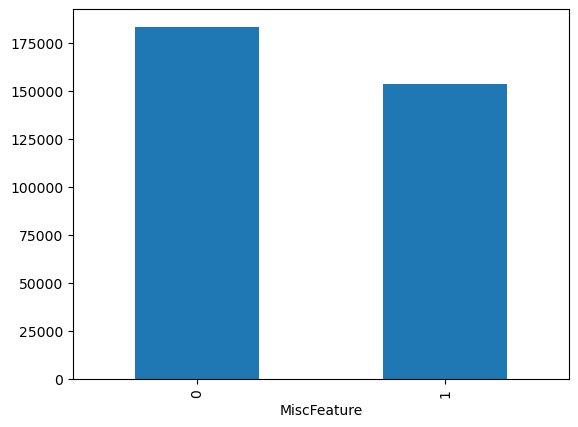

In [271]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [272]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

we have treted missing values in misc feature but we can drop that column 

## Outlier Treatment

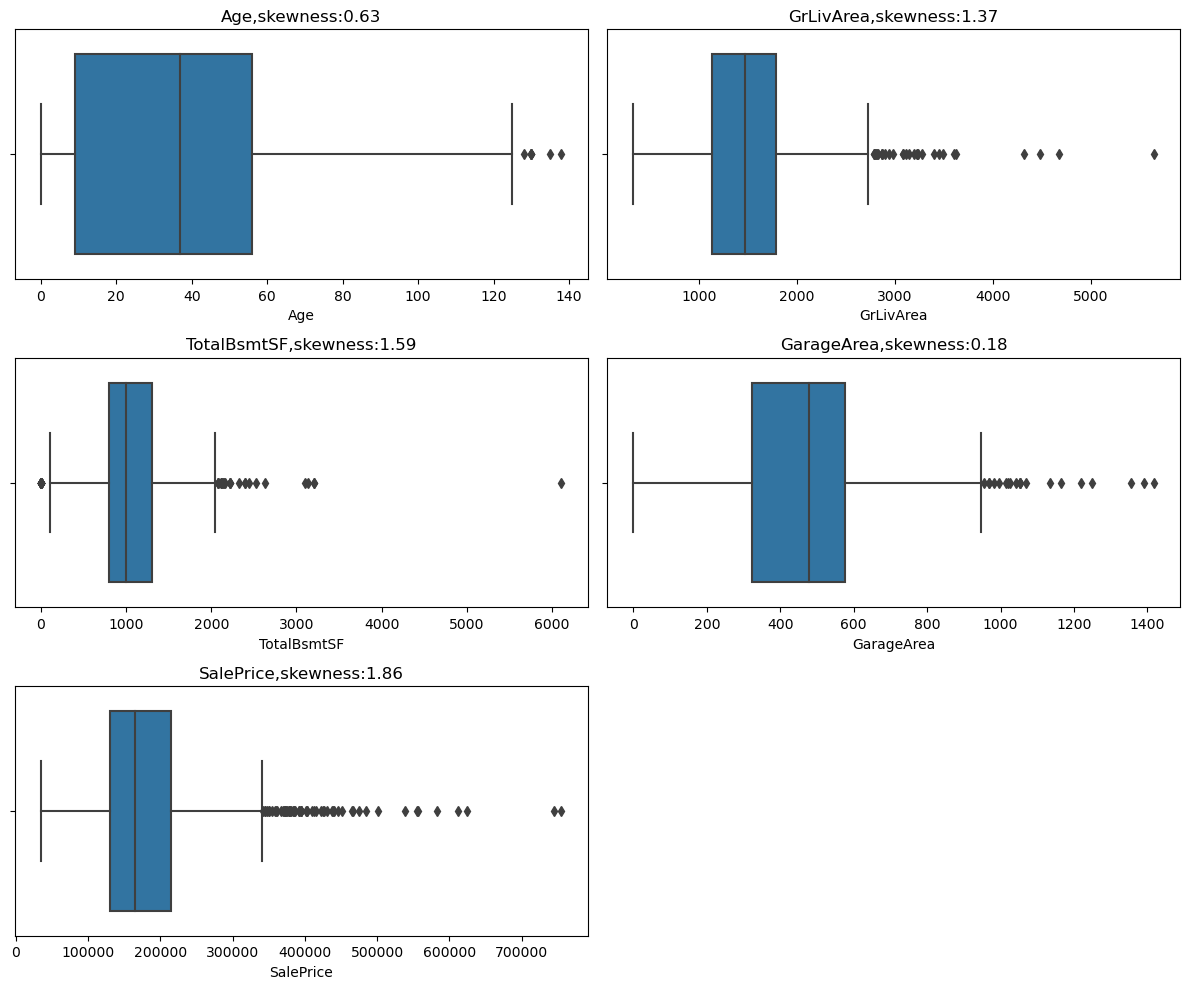

In [273]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [274]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [275]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [276]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [277]:
data.drop(index=[1260],inplace=True)

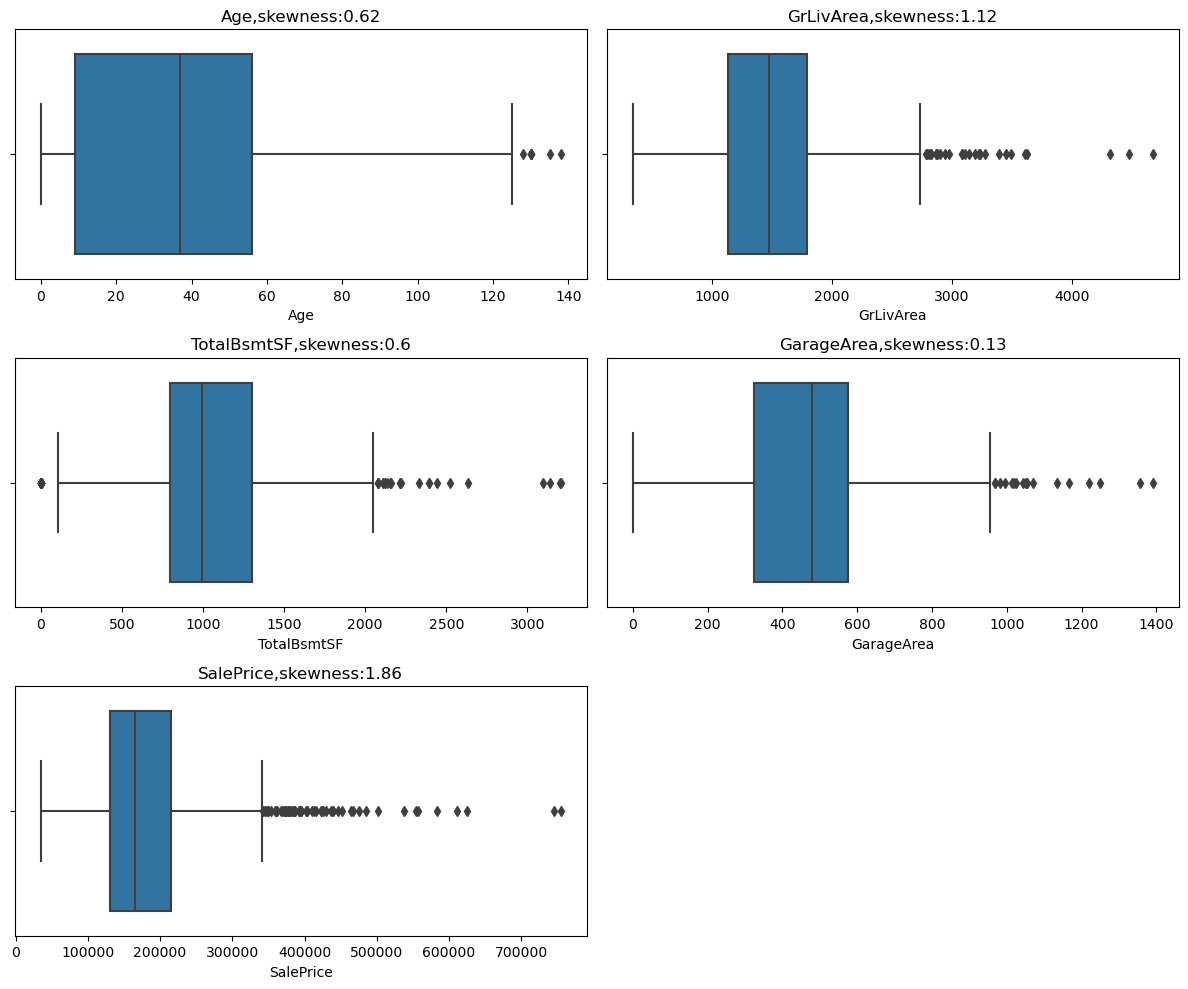

In [278]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

we can see that by removing that particular outlier by its index, the data distribution improved, skewness reduced

In [279]:
# cap the outliers
# remove the outliers

In [280]:
#Lets cap the outliers to 99th percentile in GarageArea,TotalBsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF', 'GrLivArea']:
    ul= np.percentile(data[i],99)
    data[i]= np.where(data[i]>ul,ul,data[i])

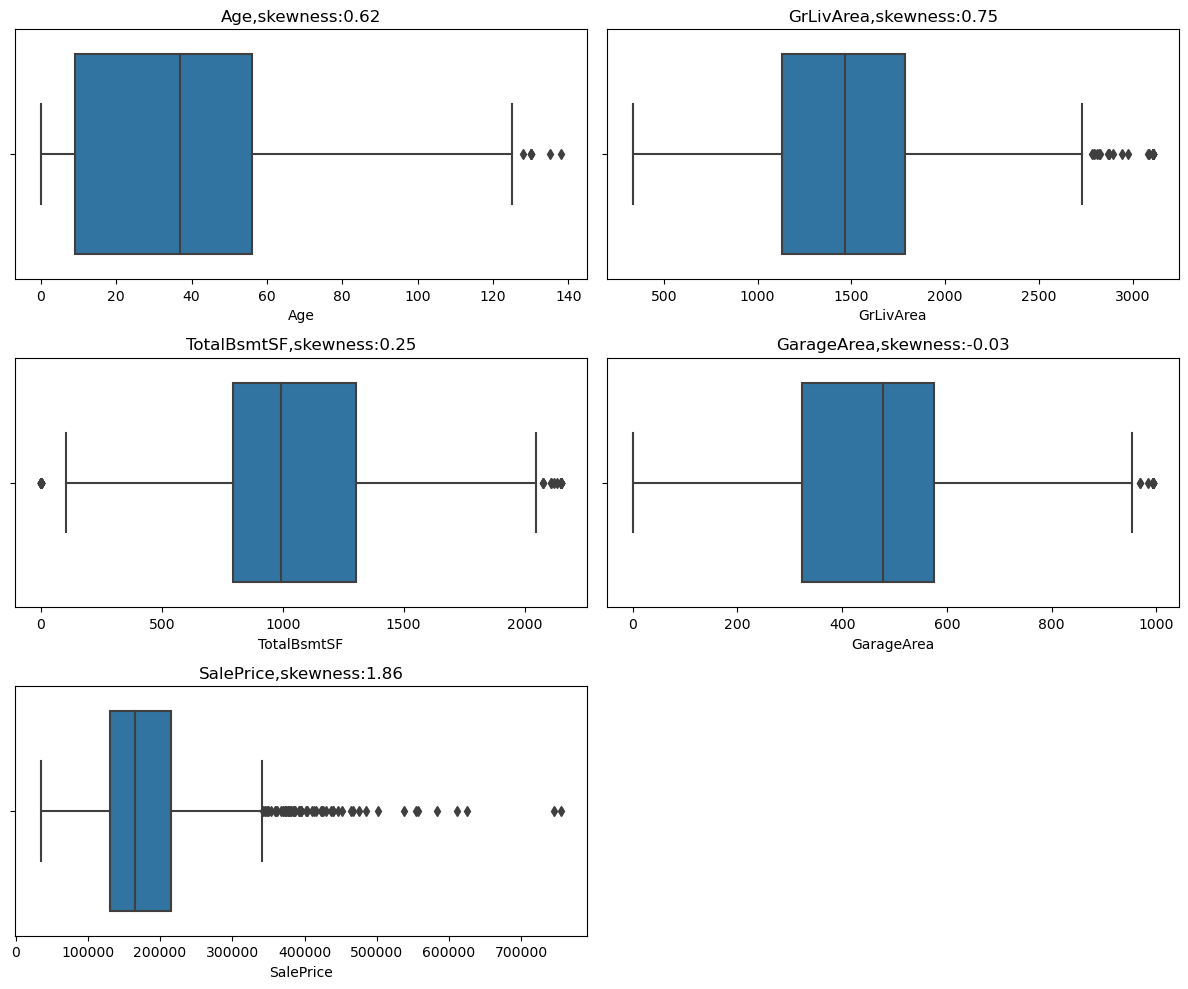

In [281]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

we can see that skewness more reduced by capping the outliers at 99th percentile,

## Feature scalling

* Normal Scaling
* Standard scaling
* Robust scaling

In [282]:
# Normal scaling and standard scaling are outlier sensitive, robust scaling is not effected by outliers

In [283]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

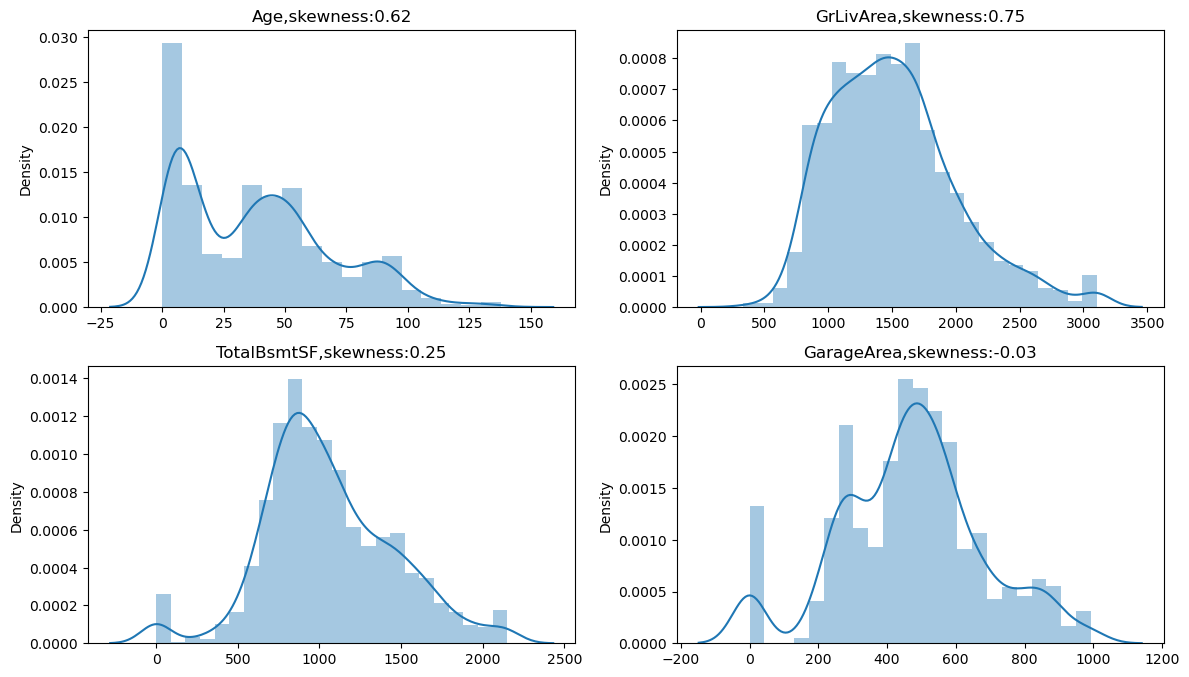

In [284]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [285]:
# as we have outliers in data, we will use robust scaler
scale=RobustScaler()

In [286]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    scale=RobustScaler()
    data[i]=scale.fit_transform(pd.DataFrame(data[i]))

In [287]:
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.272727,SBrkr,0.370031,2,Attchd,2,0.277778,0,0,208500,-0.638298
1,6,0.529644,SBrkr,-0.314985,2,Attchd,2,-0.071429,0,0,181500,-0.063830
2,7,-0.146245,SBrkr,0.486239,2,Attchd,2,0.515873,0,0,223500,-0.595745
3,7,-0.470356,SBrkr,0.380734,1,Detchd,3,0.650794,0,0,140000,1.234043
4,8,0.298419,SBrkr,1.116208,2,Attchd,3,1.420635,0,0,250000,-0.574468


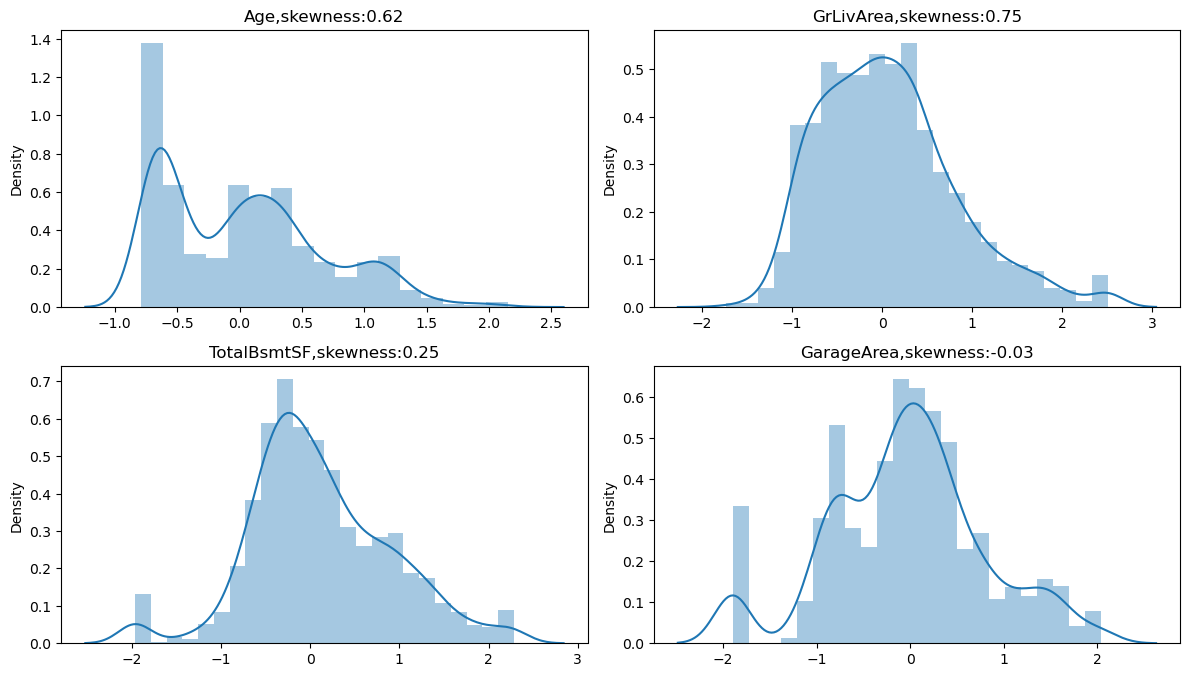

In [288]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

Scaling only changes the scale, scaling does not change the distribution

## Feature Transformation

To reduce the skewness and make the distributiion closer to normal distribution along with scaling of the distribution

we have:

* sqrt transformation
* cuberoot transformation
* log transformation
* boxcox transformation
* yeojohnson transformation

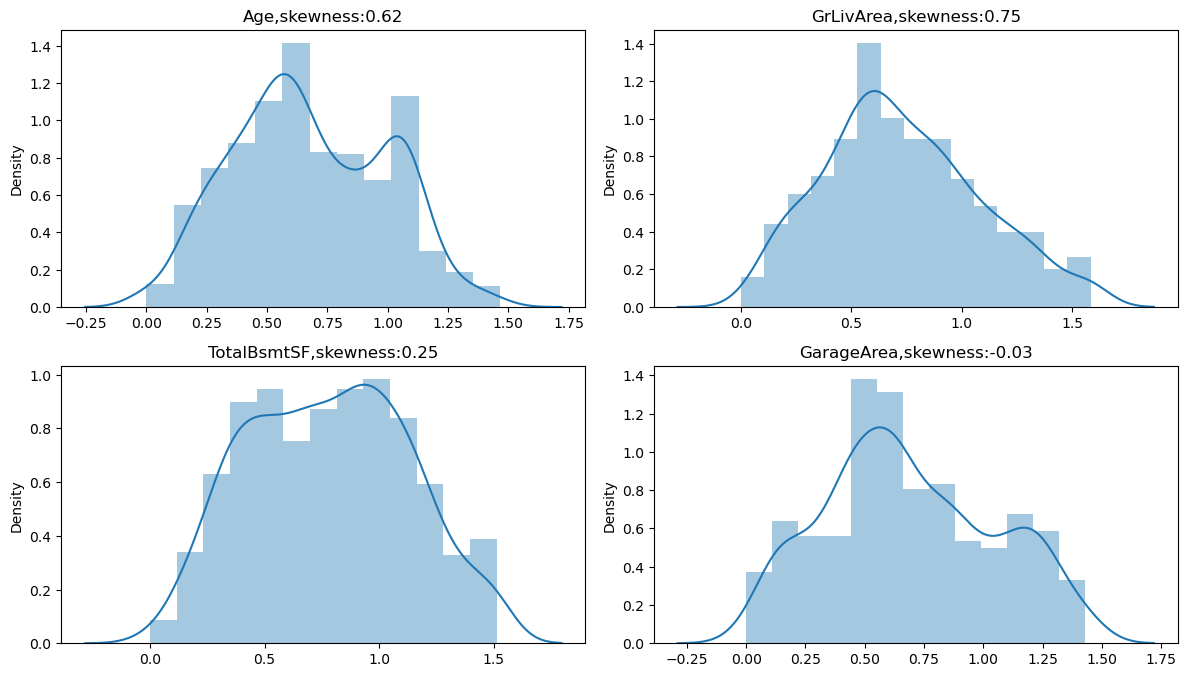

In [289]:
# sqrt transformation

plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=np.sqrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

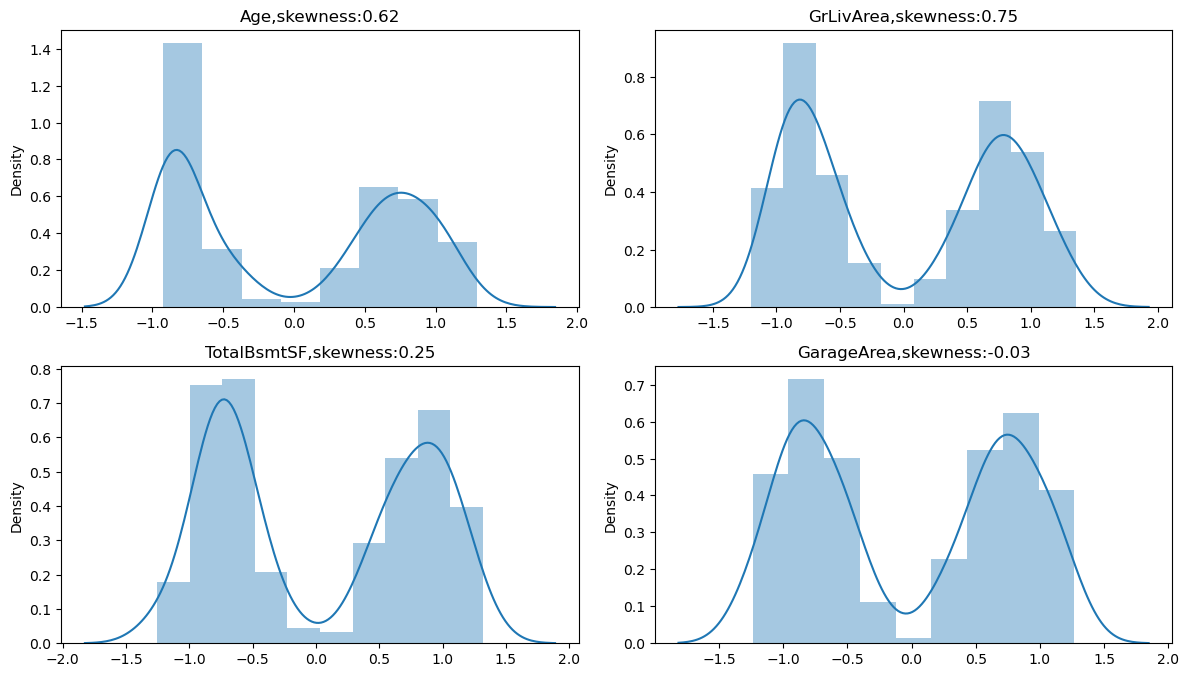

In [290]:
# cbrt transformation

plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=np.cbrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

# log transformation

plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=np.log(data[i]))
    t+=1
plt.tight_layout()
plt.show()

In [291]:
# Box-Cox Transformation

from sklearn.preprocessing import PowerTransformer

In [292]:
scale= PowerTransformer(standardize=False)

In [293]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    data[i]= scale.fit_transform(pd.DataFrame(data[i]))


In [294]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [295]:
data['GarageType'] = data['GarageType'].apply(garagetype)

In [296]:
dicti = round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [297]:
data['GarageType'] = data['GarageType'].map(dicti)

In [298]:
pd.get_dummies(data,drop_first=True,dtype=int)

,OverallQual,TotalBsmtSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,7,-0.278633,0.339389,2,208760.0,2,0.278125,0,0,208500,-0.774743,0,0,0,1
1,6,0.509631,-0.340046,2,208760.0,2,-0.071404,0,0,181500,-0.065261,0,0,0,1
2,7,-0.147997,0.435661,2,208760.0,2,0.516999,0,0,223500,-0.714978,0,0,0,1
3,7,-0.487156,0.348432,1,133853.0,3,0.652528,0,0,140000,0.906443,0,0,0,1
4,8,0.291601,0.899113,2,208760.0,3,1.427705,0,0,250000,-0.685514,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,-0.081574,0.256257,2,208760.0,2,-0.071404,0,0,175000,-0.656329,0,0,0,1
1414,6,1.010393,0.767305,2,208760.0,2,0.087338,1,0,210000,-0.110342,0,0,0,1
1415,7,0.304821,1.041422,2,208760.0,1,-0.893721,1,1,266500,0.560923,0,0,0,1
1416,5,0.163802,-0.683039,1,133853.0,1,-0.941037,0,0,142125,0.422545,0,0,0,0


In [299]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)

In [300]:
data

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.278633,1,0.339389,2,208760.0,2,0.278125,0,0,208500,-0.774743
1,6,0.509631,1,-0.340046,2,208760.0,2,-0.071404,0,0,181500,-0.065261
2,7,-0.147997,1,0.435661,2,208760.0,2,0.516999,0,0,223500,-0.714978
3,7,-0.487156,1,0.348432,1,133853.0,3,0.652528,0,0,140000,0.906443
4,8,0.291601,1,0.899113,2,208760.0,3,1.427705,0,0,250000,-0.685514
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,-0.081574,1,0.256257,2,208760.0,2,-0.071404,0,0,175000,-0.656329
1414,6,1.010393,1,0.767305,2,208760.0,2,0.087338,1,0,210000,-0.110342
1415,7,0.304821,1,1.041422,2,208760.0,1,-0.893721,1,1,266500,0.560923
1416,5,0.163802,0,-0.683039,1,133853.0,1,-0.941037,0,0,142125,0.422545


## Business Interpretation

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

from sklearn.linear_model import LinearRegression

In [302]:
# OLS model
x = data.drop(columns=['SalePrice'])
y= data['SalePrice']

In [303]:
base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     429.5
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:58:48   Log-Likelihood:                -16964.
No. Observations:                1417   AIC:                         3.395e+04
Df Residuals:                    1405   BIC:                         3.402e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.551e+04   1.18e+04      4.724      0.000    3.25e+04    7.86e+04
OverallQual  2.057e+04   1234.218     16.670      0.000    1.82e+04     2.3e+04
TotalBsmtSF  2.167e+04   1631.950     13.276      0.000    1.85e+04    2.49e+04
Electrical  -1087.3807   3984.173     -0.273      0.785   -8902.948    6728.187
GrLivArea    3.512e+04   2339.908     15.008      0.000    3.05e+04    3.97e+04
FullBath    -2051.0043   2792.572     -0.734      0.463   -7529.063    3427.055
GarageType     -0.0007      0.034     -0.021      0.983      -0.067       0.065
GarageCars   2259.8253   3288.832      0.687      0.492   -4191.725    8711.375
GarageArea   1.158e+04   2799.983      4.135      0.000    6086.547    1.71e+04
Fence         629.3045   2743.474      0.229      0.819   -4752.441    6011.050
MiscFeature  2178.1593   5506.298      0.396      0.692   -8623.292     1.3e+04
Age         -1.295e+04   2873.132     -4.509      0.000   -1.86e+04   -7318.065
==============================================================================
Omnibus:                      805.408   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17563.135
Skew:                           2.192   Prob(JB):                         0.00
Kurtosis:                      19.681   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictive Modeling

In [304]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=11)

def model_scores(x_train,y_train,x_test,y_test,model):
    m=model
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('R2:',r2_score(y_test,pred))
    print('MSE:',mean_squared_error(y_test,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE:',mean_absolute_error(y_test,pred))
    print('MAPE:', mean_absolute_percentage_error(y_test,pred))

In [305]:
def model_score(trainx,trainy,testx,testy,model):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('R-square',r2_score(testy,pred))
    print('MSE:',mean_squared_error(testy,pred))
    print('RMSE:',np.sqrt(mean_squared_error(testy,pred)))
    print('MAPE:',mean_absolute_percentage_error(testy,pred))

In [306]:
model_scores(x_train,y_train,x_test,y_test,LinearRegression())

R2: 0.7709376879293992
MSE: 1556426990.4082465
RMSE: 39451.577793647826
MAE: 25076.709239788186
MAPE: 0.1437523737572018


In [307]:
model_scores(x_train,y_train,x_train,y_train,LinearRegression())

R2: 0.7697466787367837
MSE: 1440381074.5033283
RMSE: 37952.35268732794
MAE: 25471.022966568144
MAPE: 0.157377452328298


## Cross Validation

#### K-Fold Validation

In [308]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

In [309]:
kfold=KFold(n_splits=3)

f1,f2,f3=kfold.split(x,y) # k-fold is able to create folds randomly

kfold returns the indexes only

f1

In [310]:
cross_val= cross_val_score(estimator=LinearRegression(),
                          X=x,y=y,cv=3,scoring='r2',
                          verbose=3)

[CV] END ................................ score: (test=0.810) total time=   0.0s
[CV] END ................................ score: (test=0.736) total time=   0.0s
[CV] END ................................ score: (test=0.757) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [311]:
cross_val

array([0.80997605, 0.73641861, 0.75666031])

In [312]:
print('R2 of model:',np.mean(cross_val))
print('With variation:',(np.std(cross_val)/np.mean(cross_val))*100)

R2 of model: 0.7676849896330517
With variation: 4.041379318194699


* the score of the model can be considered to be 0.76 with 4 percent of variation. This shows that model is a generalized model with less variance *

#### LOOCV ( Leave ONE Out CV)

In [313]:
loocv= cross_val_score(estimator=LinearRegression(),
                      X=x,y=y,cv=LeaveOneOut(),scoring='neg_mean_squared_error',verbose=3) # we put negative MSE, ton get the score instead of error

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ........................ score: (test=-87993249.670) total time=   0.0s
[CV] END ........................ score: (test=-18147650.540) total time=   0.0s
[CV] END ......................... score: (test=-6575806.562) total time=   0.0s
[CV] END ...................... score: (test=-3795087238.808) total time=   0.0s
[CV] END ...................... score: (test=-1224790521.858) total time=   0.0s
[CV] END ....................... score: (test=-131627231.270) total time=   0.0s
[CV] END ...................... score: (test=-1003095352.712) total time=   0.0s
[CV] END ...................... score: (test=-1173822247.650) total time=   0.0s
[CV] END ........................ score: (test=-24316411.190) total time=   0.0s
[CV] END ........................ score: (test=-10032183.459) total time=   0.0s
[CV] END ...................... score: (test=-1519661629.611) total time=   0.0s
[CV] END ...................... score: (test=-1206053745.794) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-2797753.375) total time=   0.0s
[CV] END ....................... score: (test=-570335445.708) total time=   0.0s
[CV] END ........................ score: (test=-72151050.524) total time=   0.0s
[CV] END ....................... score: (test=-955456886.781) total time=   0.0s
[CV] END ....................... score: (test=-159567693.711) total time=   0.0s
[CV] END ........................ score: (test=-87649160.335) total time=   0.0s
[CV] END ....................... score: (test=-656211851.898) total time=   0.0s
[CV] END ....................... score: (test=-323936438.467) total time=   0.0s
[CV] END ........................ score: (test=-75599672.539) total time=   0.0s
[CV] END ....................... score: (test=-419350648.926) total time=   0.0s
[CV] END ....................... score: (test=-353776990.257) total time=   0.0s
[CV] END .......................... score: (test=-222892.039) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-193044603.582) total time=   0.0s
[CV] END ....................... score: (test=-599971929.152) total time=   0.0s
[CV] END ...................... score: (test=-1484019942.675) total time=   0.0s
[CV] END ....................... score: (test=-535547537.920) total time=   0.0s
[CV] END ....................... score: (test=-929553932.228) total time=   0.0s
[CV] END ...................... score: (test=-1479170370.029) total time=   0.0s
[CV] END ........................ score: (test=-86532018.767) total time=   0.0s
[CV] END ...................... score: (test=-1369991431.066) total time=   0.0s
[CV] END ...................... score: (test=-1453013055.966) total time=   0.0s
[CV] END ....................... score: (test=-402500934.629) total time=   0.0s
[CV] END ....................... score: (test=-682759631.436) total time=   0.0s
[CV] END ....................... score: (test=-389347491.270) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-1593409733.670) total time=   0.0s
[CV] END ...................... score: (test=-2767695443.939) total time=   0.0s
[CV] END ...................... score: (test=-8479225452.502) total time=   0.0s
[CV] END ........................ score: (test=-55107115.310) total time=   0.0s
[CV] END ....................... score: (test=-962440877.913) total time=   0.0s
[CV] END ........................ score: (test=-13295010.153) total time=   0.0s
[CV] END ......................... score: (test=-5911842.285) total time=   0.0s
[CV] END ....................... score: (test=-572451966.358) total time=   0.0s
[CV] END ......................... score: (test=-5500862.274) total time=   0.0s
[CV] END ........................ score: (test=-13352048.959) total time=   0.0s
[CV] END ....................... score: (test=-257070711.489) total time=   0.0s
[CV] END ....................... score: (test=-157819382.236) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-8808844.273) total time=   0.0s
[CV] END ...................... score: (test=-1873013389.617) total time=   0.0s
[CV] END ...................... score: (test=-1043218585.153) total time=   0.0s
[CV] END ....................... score: (test=-260610142.875) total time=   0.0s
[CV] END ...................... score: (test=-1553810835.049) total time=   0.0s
[CV] END ...................... score: (test=-1344487883.389) total time=   0.0s
[CV] END ........................ score: (test=-47019578.654) total time=   0.0s
[CV] END ...................... score: (test=-1174435755.441) total time=   0.0s
[CV] END ........................ score: (test=-12642106.184) total time=   0.0s
[CV] END ...................... score: (test=-1376638418.325) total time=   0.0s
[CV] END ....................... score: (test=-740990797.188) total time=   0.0s
[CV] END .......................... score: (test=-254475.018) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-13999472.481) total time=   0.0s
[CV] END ...................... score: (test=-1723567209.335) total time=   0.0s
[CV] END ........................ score: (test=-19177526.332) total time=   0.0s
[CV] END ....................... score: (test=-615559494.530) total time=   0.0s
[CV] END ........................ score: (test=-16744182.786) total time=   0.0s
[CV] END ...................... score: (test=-2481405586.309) total time=   0.0s
[CV] END ...................... score: (test=-1091671958.774) total time=   0.0s
[CV] END ........................ score: (test=-12269037.475) total time=   0.0s
[CV] END ...................... score: (test=-4982594912.074) total time=   0.0s
[CV] END ....................... score: (test=-108740924.402) total time=   0.0s
[CV] END ....................... score: (test=-222618214.934) total time=   0.0s
[CV] END ...................... score: (test=-3612039859.810) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-147907703.876) total time=   0.0s
[CV] END ...................... score: (test=-1215339173.398) total time=   0.0s
[CV] END ........................ score: (test=-36766979.625) total time=   0.0s
[CV] END ....................... score: (test=-330693893.818) total time=   0.0s
[CV] END ..................... score: (test=-20451389270.073) total time=   0.0s
[CV] END ......................... score: (test=-6258026.871) total time=   0.0s
[CV] END ........................... score: (test=-16781.279) total time=   0.0s
[CV] END .................... score: (test=-138090798668.590) total time=   0.0s
[CV] END ...................... score: (test=-5371551510.913) total time=   0.0s
[CV] END ....................... score: (test=-104788557.874) total time=   0.0s
[CV] END ....................... score: (test=-257308275.169) total time=   0.0s
[CV] END ........................ score: (test=-28078193.373) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-235472485.984) total time=   0.0s
[CV] END ....................... score: (test=-618153762.292) total time=   0.0s
[CV] END ..................... score: (test=-14864358458.945) total time=   0.0s
[CV] END ...................... score: (test=-1112237929.301) total time=   0.0s
[CV] END ....................... score: (test=-159034575.381) total time=   0.0s
[CV] END ........................ score: (test=-87646214.397) total time=   0.0s
[CV] END ........................ score: (test=-24544619.974) total time=   0.0s
[CV] END ..................... score: (test=-52169951334.705) total time=   0.0s
[CV] END ........................ score: (test=-12183804.517) total time=   0.0s
[CV] END ......................... score: (test=-2267059.165) total time=   0.0s
[CV] END ....................... score: (test=-315377903.488) total time=   0.0s
[CV] END ...................... score: (test=-2854500613.055) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-2158618713.654) total time=   0.0s
[CV] END ........................ score: (test=-97737412.378) total time=   0.0s
[CV] END .......................... score: (test=-346877.311) total time=   0.0s
[CV] END ...................... score: (test=-1666788324.342) total time=   0.0s
[CV] END ........................ score: (test=-19662638.632) total time=   0.0s
[CV] END ....................... score: (test=-527459894.545) total time=   0.0s
[CV] END ...................... score: (test=-2915548558.959) total time=   0.0s
[CV] END ....................... score: (test=-155743931.410) total time=   0.0s
[CV] END ........................ score: (test=-78130848.897) total time=   0.0s
[CV] END ...................... score: (test=-2042971049.193) total time=   0.0s
[CV] END ....................... score: (test=-346410329.624) total time=   0.0s
[CV] END ....................... score: (test=-374967206.608) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-1000837694.566) total time=   0.0s
[CV] END ...................... score: (test=-1090460161.978) total time=   0.0s
[CV] END ....................... score: (test=-352904307.287) total time=   0.0s
[CV] END ........................ score: (test=-14299256.425) total time=   0.0s
[CV] END ....................... score: (test=-157458268.571) total time=   0.0s
[CV] END ....................... score: (test=-113069947.662) total time=   0.0s
[CV] END ....................... score: (test=-368090837.709) total time=   0.0s
[CV] END ....................... score: (test=-435293551.986) total time=   0.0s
[CV] END ...................... score: (test=-1102950179.202) total time=   0.0s
[CV] END ...................... score: (test=-2739194469.903) total time=   0.0s
[CV] END ....................... score: (test=-118732950.073) total time=   0.0s
[CV] END ...................... score: (test=-1275479126.422) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-67329406.361) total time=   0.0s
[CV] END ........................ score: (test=-36007564.445) total time=   0.0s
[CV] END ....................... score: (test=-711691426.760) total time=   0.0s
[CV] END ....................... score: (test=-199566108.849) total time=   0.0s
[CV] END ...................... score: (test=-3919309488.706) total time=   0.0s
[CV] END ....................... score: (test=-283836586.426) total time=   0.0s
[CV] END ....................... score: (test=-379684081.846) total time=   0.0s
[CV] END ....................... score: (test=-425345299.838) total time=   0.0s
[CV] END ...................... score: (test=-1249327716.902) total time=   0.0s
[CV] END ....................... score: (test=-243479393.856) total time=   0.0s
[CV] END ....................... score: (test=-495145222.854) total time=   0.0s
[CV] END ......................... score: (test=-6997780.387) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-614256259.556) total time=   0.0s
[CV] END ....................... score: (test=-288015052.848) total time=   0.0s
[CV] END ..................... score: (test=-11328347096.226) total time=   0.0s
[CV] END ....................... score: (test=-804458337.273) total time=   0.0s
[CV] END ......................... score: (test=-2509814.189) total time=   0.0s
[CV] END ....................... score: (test=-543504512.060) total time=   0.0s
[CV] END ........................ score: (test=-37443307.538) total time=   0.0s
[CV] END ...................... score: (test=-2598005084.686) total time=   0.0s
[CV] END ....................... score: (test=-139531852.415) total time=   0.0s
[CV] END ....................... score: (test=-701391188.876) total time=   0.0s
[CV] END ...................... score: (test=-2532840443.434) total time=   0.0s
[CV] END ....................... score: (test=-617908341.062) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-211025026.956) total time=   0.0s
[CV] END ...................... score: (test=-6185753304.911) total time=   0.0s
[CV] END ...................... score: (test=-1714766921.246) total time=   0.0s
[CV] END ....................... score: (test=-175433630.577) total time=   0.0s
[CV] END ....................... score: (test=-182418011.536) total time=   0.0s
[CV] END ...................... score: (test=-5417721522.529) total time=   0.0s
[CV] END ....................... score: (test=-103034734.238) total time=   0.0s
[CV] END ....................... score: (test=-814388225.919) total time=   0.0s
[CV] END ........................ score: (test=-44591985.260) total time=   0.0s
[CV] END ....................... score: (test=-106004807.307) total time=   0.0s
[CV] END ....................... score: (test=-153158316.034) total time=   0.0s
[CV] END ....................... score: (test=-100884485.132) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-408084925.191) total time=   0.0s
[CV] END ...................... score: (test=-1837735164.166) total time=   0.0s
[CV] END ....................... score: (test=-426004047.585) total time=   0.0s
[CV] END ......................... score: (test=-9048944.691) total time=   0.0s


[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:   26.5s finished


In [314]:
loocv

array([-8.79932497e+07, -1.81476505e+07, -6.57580656e+06, ...,
       -1.83773516e+09, -4.26004048e+08, -9.04894469e+06])

In [315]:
print('MSE:',np.abs(np.mean(loocv)))

MSE: 1495479216.9771929


In [316]:
loocv1= cross_val_score(estimator=LinearRegression(),
                      X=x,y=y,cv=LeaveOneOut(),scoring='neg_mean_absolute_percentage_error',verbose=3) # we put negative MSE, ton get the score instead of error

[CV] END ............................... score: (test=-0.045) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ............................... score: (test=-0.023) total time=   0.0s
[CV] END ............................... score: (test=-0.011) total time=   0.0s
[CV] END ............................... score: (test=-0.440) total time=   0.0s
[CV] END ............................... score: (test=-0.140) total time=   0.0s
[CV] END ............................... score: (test=-0.080) total time=   0.0s
[CV] END ............................... score: (test=-0.103) total time=   0.0s
[CV] END ............................... score: (test=-0.171) total time=   0.0s
[CV] END ............................... score: (test=-0.042) total time=   0.0s
[CV] END ............................... score: (test=-0.024) total time=   0.0s
[CV] END ............................... score: (test=-0.113) total time=   0.0s
[CV] END ............................... score: (test=-0.241) total time=   0.0s
[CV] END ............................... score: (test=-0.105) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.019) total time=   0.0s
[CV] END ............................... score: (test=-0.087) total time=   0.0s
[CV] END ............................... score: (test=-0.011) total time=   0.0s
[CV] END ............................... score: (test=-0.075) total time=   0.0s
[CV] END ............................... score: (test=-0.052) total time=   0.0s
[CV] END ............................... score: (test=-0.172) total time=   0.0s
[CV] END ............................... score: (test=-0.126) total time=   0.0s
[CV] END ............................... score: (test=-0.069) total time=   0.0s
[CV] END ............................... score: (test=-0.166) total time=   0.0s
[CV] END ............................... score: (test=-0.099) total time=   0.0s
[CV] END ............................... score: (test=-0.103) total time=   0.0s
[CV] END ............................... score: (test=-0.160) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.068) total time=   0.0s
[CV] END ............................... score: (test=-0.079) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.181) total time=   0.0s
[CV] END ............................... score: (test=-0.074) total time=   0.0s
[CV] END ............................... score: (test=-0.222) total time=   0.0s
[CV] END ............................... score: (test=-0.221) total time=   0.0s
[CV] END ............................... score: (test=-0.147) total time=   0.0s
[CV] END ............................... score: (test=-0.064) total time=   0.0s
[CV] END ............................... score: (test=-0.274) total time=   0.0s
[CV] END ............................... score: (test=-0.208) total time=   0.0s
[CV] END ............................... score: (test=-0.119) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.065) total time=   0.0s
[CV] END ............................... score: (test=-0.054) total time=   0.0s
[CV] END ............................... score: (test=-0.002) total time=   0.0s
[CV] END ............................... score: (test=-0.149) total time=   0.0s
[CV] END ............................... score: (test=-0.156) total time=   0.0s
[CV] END ............................... score: (test=-0.103) total time=   0.0s
[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ............................... score: (test=-0.214) total time=   0.0s
[CV] END ............................... score: (test=-0.153) total time=   0.0s
[CV] END ............................... score: (test=-0.624) total time=   0.0s
[CV] END ............................... score: (test=-0.100) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.062) total time=   0.0s
[CV] END ............................... score: (test=-0.617) total time=   0.0s
[CV] END ............................... score: (test=-0.166) total time=   0.0s
[CV] END ............................... score: (test=-0.108) total time=   0.0s
[CV] END ............................... score: (test=-0.177) total time=   0.0s
[CV] END ............................... score: (test=-0.419) total time=   0.0s
[CV] END ............................... score: (test=-0.010) total time=   0.0s
[CV] END ............................... score: (test=-0.184) total time=   0.0s
[CV] END ............................... score: (test=-0.061) total time=   0.0s
[CV] END ............................... score: (test=-0.128) total time=   0.0s
[CV] END ............................... score: (test=-0.085) total time=   0.0s
[CV] END ............................... score: (test=-0.141) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.094) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ............................... score: (test=-0.085) total time=   0.0s
[CV] END ............................... score: (test=-0.034) total time=   0.0s
[CV] END ............................... score: (test=-0.401) total time=   0.0s
[CV] END ............................... score: (test=-0.007) total time=   0.0s
[CV] END ............................... score: (test=-0.110) total time=   0.0s
[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.071) total time=   0.0s
[CV] END ............................... score: (test=-0.222) total time=   0.0s
[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.103) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.229) total time=   0.0s
[CV] END ............................... score: (test=-0.162) total time=   0.0s
[CV] END ............................... score: (test=-0.714) total time=   0.0s
[CV] END ............................... score: (test=-0.119) total time=   0.0s
[CV] END ............................... score: (test=-0.010) total time=   0.0s
[CV] END ............................... score: (test=-0.379) total time=   0.0s
[CV] END ............................... score: (test=-0.043) total time=   0.0s
[CV] END ............................... score: (test=-0.332) total time=   0.0s
[CV] END ............................... score: (test=-0.079) total time=   0.0s
[CV] END ............................... score: (test=-0.192) total time=   0.0s
[CV] END ............................... score: (test=-0.125) total time=   0.0s
[CV] END ............................... score: (test=-0.147) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.188) total time=   0.0s
[CV] END ............................... score: (test=-0.130) total time=   0.0s
[CV] END ............................... score: (test=-0.136) total time=   0.0s
[CV] END ............................... score: (test=-0.029) total time=   0.0s
[CV] END ............................... score: (test=-0.223) total time=   0.0s
[CV] END ............................... score: (test=-0.098) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ............................... score: (test=-0.139) total time=   0.0s
[CV] END ............................... score: (test=-0.004) total time=   0.0s
[CV] END ............................... score: (test=-0.036) total time=   0.0s
[CV] END ............................... score: (test=-0.237) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.074) total time=   0.0s
[CV] END ............................... score: (test=-0.067) total time=   0.0s
[CV] END ............................... score: (test=-0.038) total time=   0.0s
[CV] END ............................... score: (test=-0.061) total time=   0.0s
[CV] END ............................... score: (test=-0.317) total time=   0.0s
[CV] END ............................... score: (test=-0.185) total time=   0.0s
[CV] END ............................... score: (test=-0.030) total time=   0.0s
[CV] END ............................... score: (test=-0.428) total time=   0.0s
[CV] END ............................... score: (test=-0.049) total time=   0.0s
[CV] END ............................... score: (test=-0.093) total time=   0.0s
[CV] END ............................... score: (test=-0.026) total time=   0.0s
[CV] END ............................... score: (test=-0.099) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.079) total time=   0.0s
[CV] END ............................... score: (test=-0.083) total time=   0.0s
[CV] END ............................... score: (test=-0.234) total time=   0.0s
[CV] END ............................... score: (test=-0.018) total time=   0.0s
[CV] END ............................... score: (test=-0.575) total time=   0.0s
[CV] END ............................... score: (test=-0.201) total time=   0.0s
[CV] END ............................... score: (test=-0.196) total time=   0.0s
[CV] END ............................... score: (test=-0.243) total time=   0.0s
[CV] END ............................... score: (test=-0.210) total time=   0.0s
[CV] END ............................... score: (test=-0.306) total time=   0.0s
[CV] END ............................... score: (test=-0.048) total time=   0.0s
[CV] END ............................... score: (test=-0.052) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.056) total time=   0.0s
[CV] END ............................... score: (test=-0.075) total time=   0.0s
[CV] END ............................... score: (test=-0.073) total time=   0.0s
[CV] END ............................... score: (test=-0.220) total time=   0.0s
[CV] END ............................... score: (test=-0.073) total time=   0.0s
[CV] END ............................... score: (test=-0.169) total time=   0.0s
[CV] END ............................... score: (test=-0.176) total time=   0.0s
[CV] END ............................... score: (test=-0.074) total time=   0.0s
[CV] END ............................... score: (test=-0.071) total time=   0.0s
[CV] END ............................... score: (test=-0.028) total time=   0.0s
[CV] END ............................... score: (test=-0.044) total time=   0.0s
[CV] END ............................... score: (test=-0.266) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.089) total time=   0.0s
[CV] END ............................... score: (test=-0.074) total time=   0.0s
[CV] END ............................... score: (test=-0.014) total time=   0.0s
[CV] END ............................... score: (test=-0.150) total time=   0.0s
[CV] END ............................... score: (test=-0.034) total time=   0.0s
[CV] END ............................... score: (test=-0.078) total time=   0.0s
[CV] END ............................... score: (test=-0.095) total time=   0.0s
[CV] END ............................... score: (test=-0.336) total time=   0.0s
[CV] END ............................... score: (test=-0.570) total time=   0.0s
[CV] END ............................... score: (test=-0.428) total time=   0.0s
[CV] END ............................... score: (test=-0.154) total time=   0.0s
[CV] END ............................... score: (test=-0.118) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.262) total time=   0.0s
[CV] END ............................... score: (test=-0.006) total time=   0.0s
[CV] END ............................... score: (test=-0.038) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ............................... score: (test=-0.049) total time=   0.0s
[CV] END ............................... score: (test=-0.256) total time=   0.0s
[CV] END ............................... score: (test=-0.245) total time=   0.0s
[CV] END ............................... score: (test=-0.960) total time=   0.0s
[CV] END ............................... score: (test=-0.152) total time=   0.0s
[CV] END ............................... score: (test=-0.676) total time=   0.0s
[CV] END ............................... score: (test=-1.039) total time=   0.0s
[CV] END ............................... score: (test=-0.104) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.248) total time=   0.0s
[CV] END ............................... score: (test=-0.092) total time=   0.0s
[CV] END ............................... score: (test=-0.032) total time=   0.0s
[CV] END ............................... score: (test=-0.275) total time=   0.0s
[CV] END ............................... score: (test=-0.074) total time=   0.0s
[CV] END ............................... score: (test=-0.120) total time=   0.0s
[CV] END ............................... score: (test=-0.004) total time=   0.0s
[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.066) total time=   0.0s
[CV] END ............................... score: (test=-0.102) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.228) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:   29.3s finished


In [317]:
print('MAPE:',np.abs(np.mean(loocv1)))

MAPE: 0.15843350314078805


## Feature Selection

In [322]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE,RFECV

### SFS (Sequential Feature Selection)


#### Forward Selection Method

Algorithm:
    
    1. It starts form the null model
    2. it adds the feature with the highest correlation with target in the model.
    3. It picks the second column from the remaining dataset with the highest correlation.
    4. It builds the model ny adding the new feature to it.
    5. This repeats untill it has included all the columns.
    
User can pass the no of columns he wants or he can find the no. of columns with best score

In [326]:
sfs_f= SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',scoring='r2',cv=3,verbose=3)

In [327]:
sfs_f.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2024-02-09 14:14:04] Features: 1/11 -- score: 0.6175337821947074[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2024-02-09 14:14:04] Features: 2/11 -- score: 0.6958351110339702[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Para

SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          k_features=(1, 11), scoring='r2', verbose=3)

In [328]:
sfs_f.k_score_

0.7629712460016772

In [329]:
sfs_f.k_feature_names_

('OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Age')

In [330]:
x_train_sfs= x_train[list(sfs_f.k_feature_names_)]
x_test_sfs= x_test[list(sfs_f.k_feature_names_)]

In [331]:
model_scores(x_train_sfs,y_train,x_test_sfs,y_test,LinearRegression())

R2: 0.7723255711365835
MSE: 1546996635.568685
RMSE: 39331.87810884048
MAE: 25019.90211898678
MAPE: 0.14305766330903757


#### Backward Selection Method

Algorithm:
    
    1. It starts form the full model.
    2. It removes the column which is least significant(highest p-value)
    3. It again fits a model with (k-1) features.
    4. Again it will remove the column which is least significant.
    5. It will repeat until all the columns are exhausted.

User can pass the no of columns he wants or he can find the no. of columns with best score

In [332]:
sfs_b= SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',scoring='r2',cv=3,verbose=3,forward=False)

In [333]:
sfs_b.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2024-02-09 14:26:39] Features: 10/1 -- score: 0.7606385364688624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2024-02-09 14:26:40] Features: 9/1 -- score: 0.7615050286736302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Paral

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), forward=False,
                          k_features=(1, 11), scoring='r2', verbose=3)

In [334]:
sfs_b.k_score_

0.7629712460016772

In [335]:
sfs_b.feature_names

['OverallQual',
 'TotalBsmtSF',
 'Electrical',
 'GrLivArea',
 'FullBath',
 'GarageType',
 'GarageCars',
 'GarageArea',
 'Fence',
 'MiscFeature',
 'Age']

In [336]:
x_train_sfs= x_train[list(sfs_b.k_feature_names_)]
x_test_sfs= x_test[list(sfs_b.k_feature_names_)]

In [337]:
model_scores(x_train_sfs,y_train,x_test_sfs,y_test,LinearRegression())

R2: 0.7723255711365835
MSE: 1546996635.568685
RMSE: 39331.87810884048
MAE: 25019.90211898678
MAPE: 0.14305766330903757


#### RFE (Recursive Feature Elimination)

In [338]:
rfe= RFE(estimator=LinearRegression(),n_features_to_select=8,step=2)

In [340]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8, step=2)

In [345]:
rfe.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'Age'], dtype=object)

In [346]:
rfe.score(x_test,y_test)

0.7709628041837968

#### RFECV

In [349]:
rfecv= RFECV(estimator=LinearRegression(),step=2,cv=3,verbose=3)

In [350]:
rfecv.fit(x_train,y_train)

Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.


RFECV(cv=3, estimator=LinearRegression(), step=2, verbose=3)

In [351]:
rfecv.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'Age'], dtype=object)

In [352]:
rfecv.score(x_test,y_test)

0.7710488495119885